In [176]:
## libraries ##

import os
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.backends.backend_pdf import PdfPages
# from plotnine import ggplot, aes, geom_point, theme_minimal

In [201]:
## functions for plot ##
def plot_mode_points(ax, simresult_df):
    p_cex = 7
    p_alpha = 0.2
    p_pch = 20

    # Convert alpha for colors
    red_color = mcolors.to_rgba("#FA7268", alpha=p_alpha)
    blue_color = mcolors.to_rgba("#0080ff", alpha=p_alpha)
    green_color = mcolors.to_rgba("#009900", alpha=p_alpha)

    # Plot the first point
    ax.scatter(simresult_df.iloc[0]['spacing'], simresult_df.iloc[0]['v_fol'], 
                color='black', s=10, marker='o')

    # Plot the last point
    ax.scatter(simresult_df.iloc[-1]['spacing'], simresult_df.iloc[-1]['v_fol'], 
                color='black', s=10, marker='^')

    # Plot points where Fol.a >= 0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] >= 0.3048]['spacing'], 
                simresult_df[simresult_df['acc_fol'] >= 0.3048]['v_fol'], 
                color='red', s=p_cex, marker='o')

    # Plot points where Fol.a <= -0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] <= -0.3048]['spacing'], 
                simresult_df[simresult_df['acc_fol'] <= -0.3048]['v_fol'], 
                color='blue', s=p_cex, marker='o')

    # Plot points where -0.3048 < Fol.a < 0.3048
    ax.scatter(simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['spacing'], 
                simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['v_fol'], 
                color='green', s=p_cex, marker='o')

    # Show plot
    ax.set_xlabel('spacing')
    ax.set_ylabel('v_fol')
    # ax.legend()
    # ax.show()

def plot_mode_points_x(ax, simresult_df):
    p_cex = 7
    p_alpha = 0.5
    p_pch = 20

    # Convert alpha for colors
    red_color = mcolors.to_rgba("#FA7268", alpha=p_alpha)
    blue_color = mcolors.to_rgba("#0080ff", alpha=p_alpha)
    green_color = mcolors.to_rgba("#009900", alpha=p_alpha)

    # Plot the first point
    ax.scatter(simresult_df.iloc[0]['time'], simresult_df.iloc[0]['x_fol'], 
                color='black', s=10, marker='o')

    # Plot the last point
    ax.scatter(simresult_df.iloc[-1]['time'], simresult_df.iloc[-1]['x_fol'], 
                color='black', s=10, marker='^')

    # Plot points where Fol.a >= 0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] >= 0.3048]['time'], 
                simresult_df[simresult_df['acc_fol'] >= 0.3048]['x_fol'], 
                color='red', s=p_cex, marker='o')

    # Plot points where Fol.a <= -0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] <= -0.3048]['time'], 
                simresult_df[simresult_df['acc_fol'] <= -0.3048]['x_fol'], 
                color='blue', s=p_cex, marker='o')

    # Plot points where -0.3048 < Fol.a < 0.3048
    ax.scatter(simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['time'], 
                simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['x_fol'], 
                color='green', s=p_cex, marker='o')

    # Show plot
    ax.set_xlabel('Time')
    ax.set_ylabel('x_fol')
    # ax.legend()
    # ax.show()
       
def plot_mode_points_v(ax, simresult_df):
    p_cex = 7
    p_alpha = 0.5
    p_pch = 20

    # Convert alpha for colors
    red_color = mcolors.to_rgba("#FA7268", alpha=p_alpha)
    blue_color = mcolors.to_rgba("#0080ff", alpha=p_alpha)
    green_color = mcolors.to_rgba("#009900", alpha=p_alpha)

    # Plot the first point
    ax.scatter(simresult_df.iloc[0]['time'], simresult_df.iloc[0]['v_fol'], 
                color='black', s=10, marker='o')

    # Plot the last point
    ax.scatter(simresult_df.iloc[-1]['time'], simresult_df.iloc[-1]['v_fol'], 
                color='black', s=10, marker='^')

    # Plot points where Fol.a >= 0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] >= 0.3048]['time'], 
                simresult_df[simresult_df['acc_fol'] >= 0.3048]['v_fol'], 
                color='red', s=p_cex, marker='o')

    # Plot points where Fol.a <= -0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] <= -0.3048]['time'], 
                simresult_df[simresult_df['acc_fol'] <= -0.3048]['v_fol'], 
                color='blue', s=p_cex, marker='o')

    # Plot points where -0.3048 < Fol.a < 0.3048
    ax.scatter(simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['time'], 
                simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['v_fol'], 
                color='green', s=p_cex, marker='o')

    # Show plot
    ax.set_xlabel('Time')
    ax.set_ylabel('v_fol')
    # ax.legend()
    # ax.show()
     
def plot_mode_points_a(ax, simresult_df):
    p_cex = 0.7
    p_alpha = 0.5
    p_pch = 20

    # Convert alpha for colors
    red_color = mcolors.to_rgba("#FA7268", alpha=p_alpha)
    blue_color = mcolors.to_rgba("#0080ff", alpha=p_alpha)
    green_color = mcolors.to_rgba("#009900", alpha=p_alpha)

    # Plot the first point
    ax.scatter(simresult_df.iloc[0]['time'], simresult_df.iloc[0]['acc_fol'], 
                color='black', s=10, marker='o')

    # Plot the last point
    ax.scatter(simresult_df.iloc[-1]['time'], simresult_df.iloc[-1]['acc_fol'], 
                color='black', s=10, marker='^')

    # Plot points where Fol.a >= 0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] >= 0.3048]['time'], 
                simresult_df[simresult_df['acc_fol'] >= 0.3048]['acc_fol'], 
                color='red', s=p_cex, marker='o')

    # Plot points where Fol.a <= -0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] <= -0.3048]['time'], 
                simresult_df[simresult_df['acc_fol'] <= -0.3048]['acc_fol'], 
                color='blue', s=p_cex, marker='o')

    # Plot points where -0.3048 < Fol.a < 0.3048
    ax.scatter(simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['time'], 
                simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['acc_fol'], 
                color='green', s=p_cex, marker='o')

    # Show plot
    ax.set_xlabel('Time')
    ax.set_ylabel('acc_fol')
    # ax.legend()
    # ax.show()
    
def generate_plots(LFdata, pairID_fin, sig1):
    # Ensure the output directory exists
    output_dir = os.path.join(os.getcwd(), "SS_pneuma_new")
    os.makedirs(output_dir, exist_ok=True)

    # Loop through each pair in pairID_fin
    for i, (index, row) in enumerate(pairID_fin.iterrows()):
        leaderID = row['veh_id_pre']
        followerID = row['veh_id_fol']

        # Filter data for the current pair
        temp = LFdata[(LFdata['veh_id_fol'] == followerID) & (LFdata['veh_id_pre'] == leaderID)]
        if temp.empty:
            continue  # Skip if no data for this pair

        temp = temp.sort_values(by='time')
        time_range = temp['time'].max() - temp['time'].min()

        if time_range > 30:
            # Create a new PDF file for plotting
            pdf_path = os.path.join(output_dir, f"Traj_c_{i}_{leaderID}_{followerID}.pdf")

            with PdfPages(pdf_path) as pdf:
                # Define plot properties
                plot_params = {
                    'linewidth': 1.5,
                }

                # Plot for Fol.Loc vs Time
                fig, ax = plt.subplots()
                ax.plot(temp['time'], temp['x_fol'], linestyle='-', **plot_params)
                ax.set_ylim(50, 320)
                ax.grid(linewidth=1.5)
                plot_mode_points_x(ax, temp)
                ax.plot(temp['time'], temp['x_pre'], linestyle='--', **plot_params)
                pdf.savefig(fig)
                plt.close(fig)

                # Plot for Fol.V vs Time
                fig, ax = plt.subplots()
                ax.plot(temp['time'], temp['v_fol'], linestyle='-', **plot_params)
                ax.set_ylim(0, 100)
                ax.grid(linewidth=1.5)
                plot_mode_points_v(ax, temp)
                ax.plot(temp['time'], temp['v_fol'], linestyle='--', **plot_params)
                pdf.savefig(fig)
                plt.close(fig)

                # Plot for Fol.a vs Time
                fig, ax = plt.subplots()
                ax.plot(temp['time'], temp['acc_fol'], linestyle='-', **plot_params)
                ax.set_ylim(-8, 8)
                ax.grid(linewidth=1.5)
                plot_mode_points_a(ax, temp)
                ax.plot(temp['time'], temp['acc_fol'], linestyle='--', **plot_params)
                pdf.savefig(fig)
                plt.close(fig)

                # Plot for Spacing vs Fol.V (full range)
                fig, ax = plt.subplots()
                ax.plot(temp['spacing'], temp['v_fol'], linestyle='-', **plot_params)
                ax.set_xlim(0, 200)
                ax.set_ylim(0, 100)
                ax.grid(linewidth=1.5)
                plot_mode_points(ax, temp)
                ax.plot(temp['spacing'], temp['v_fol'], linestyle='-', **plot_params)
                pdf.savefig(fig)
                plt.close(fig)

                # Plot for Spacing vs Fol.V (zoomed range)
                fig, ax = plt.subplots()
                ax.plot(temp['spacing'], temp['v_fol'], linestyle='-', **plot_params)
                ax.set_xlim(0, 50)
                ax.set_ylim(0, 60)
                ax.grid(linewidth=1.5)
                plot_mode_points(ax, temp)
                ax.plot(temp['spacing'], temp['v_fol'], linestyle='-', **plot_params)
                pdf.savefig(fig)
                plt.close(fig)

                # Additional plot if specific condition is met
                if ((temp['signal_fol'] == 1) & (temp['signal_pre'] == 2)).any():
                    temp.loc[temp['signal_fol'] == 1, 'spacing'] = sig1 - temp['x_fol']
                    temp.loc[temp['time'] < 112, 'spacing'] = sig1 - temp['x_fol']
                    fig, ax = plt.subplots()
                    ax.plot(temp['spacing'], temp['v_fol'], linestyle='-', **plot_params)
                    ax.set_xlim(-100, 200)
                    ax.set_ylim(0, 100)
                    ax.grid(linewidth=1.5)
                    plot_mode_points(ax, temp)
                    ax.plot(temp['spacing'], temp['v_fol'], linestyle='-', **plot_params)
                    pdf.savefig(fig)
                    plt.close(fig)

In [14]:
## Data Import ##

current_folder = os.getcwd()
datadir = f"{current_folder}\\Data\\D8"
folder1 = f"{datadir}\\20181024\\0930_1000"
folder2 = f"{datadir}\\20181029\\1000_1030"

# Function to list all .csv files in subdirectories
def list_csv_files(folder):
    subdirs = [os.path.join(folder, d) for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]
    csv_files = []
    for subdir in subdirs:
        csv_files.extend(glob.glob(os.path.join(subdir, "*.csv")))
    return csv_files

# Get CSV files from both folders
csv_files_folder1 = list_csv_files(folder1)
csv_files_folder2 = list_csv_files(folder2)

# Combine results from both folders
all_csv_files = csv_files_folder1 + csv_files_folder2


In [15]:
all_csv_files

['e:\\Dropbox\\STSlab\\0.논문작업\\urbanCoasting\\Data\\D8\\20181024\\0930_1000\\L\\20181024_D8_0930_1000_L.csv',
 'e:\\Dropbox\\STSlab\\0.논문작업\\urbanCoasting\\Data\\D8\\20181024\\0930_1000\\M\\20181024_D8_0930_1000_M.csv',
 'e:\\Dropbox\\STSlab\\0.논문작업\\urbanCoasting\\Data\\D8\\20181024\\0930_1000\\R\\20181024_D8_0930_1000_R.csv',
 'e:\\Dropbox\\STSlab\\0.논문작업\\urbanCoasting\\Data\\D8\\20181029\\1000_1030\\L\\20181029_D8_1000_1030_L.csv',
 'e:\\Dropbox\\STSlab\\0.논문작업\\urbanCoasting\\Data\\D8\\20181029\\1000_1030\\M\\20181029_D8_1000_1030_M.csv',
 'e:\\Dropbox\\STSlab\\0.논문작업\\urbanCoasting\\Data\\D8\\20181029\\1000_1030\\R\\20181029_D8_1000_1030_R.csv']

In [124]:
def extract_attributes_from_filename(filename):
    # Extract base filename without path and extension
    base_name = os.path.basename(filename).replace('.csv', '')
    
    # Regular expression to extract date, time, and lane
    match = re.match(r'(\d{8})_D\d+_(\d{4})_(\d{4})_([A-Z])', base_name)
    if match:
        date, time_start, _, lane = match.groups()
        return {
            'date': date,
            'time_start': time_start,
            'lane': lane
        }
    return {'date': 'Unknown', 'time_start': 'Unknown', 'lane': 'Unknown'}

# Read all CSV files into a list of DataFrames with attributes
dataframes_with_attrs = []
for file in all_csv_files:
    df = pd.read_csv(file)
    attrs = extract_attributes_from_filename(file)
    df['date'] = attrs['date']
    df['time_start'] = attrs['time_start']
    df['lane'] = attrs['lane']
    dataframes_with_attrs.append(df)


In [125]:
# Example of accessing and preprocessing DataFrames with attributes
for df in dataframes_with_attrs:
    # Apply preprocessing logic here
    # Example: df = preprocess(df)  # Replace with actual preprocessing function
    df['veh_id'] = df['track_id'].astype(str) + df['type']
    df['x'] = - df['x'] + df['x'].max()
    # print(df.head())  # Print the first few rows of each DataFrame

In [142]:
def find_pre_veh(df):
    # Sort the dataframe by 'time' and 'x' in descending order
    df = df.sort_values(by=['time', 'x'], ascending=[True, False]).copy()

    # Create the 'pre_veh' column
    df['pre_veh'] = df.groupby('time')['veh_id'].shift(1, fill_value=-1)
    
    # Create the 'spacing' column
    df['spacing'] = df.groupby('time')['x'].diff(-1).shift(1, fill_value=9999).fillna(9999)
    
    # Set spacing to 9999 where there's only one vehicle at a timestep
    single_vehicle_mask = df.groupby('time')['veh_id'].transform('count') == 1
    df.loc[single_vehicle_mask, 'spacing'] = 9999

    df = df.sort_values(by=['track_id', 'time'], ascending=[True, True]).copy()
    
    return df

for i in range(len(dataframes_with_attrs)):
    dataframes_with_attrs[i] = find_pre_veh(dataframes_with_attrs[i])
    # print(dataframes_with_attrs[i].head())

In [182]:
def generate_lfdata(new_df, sig1):
    # Ensure 'status' column exists
    new_df = new_df[['time', 'veh_id', 'pre_veh', 'x', 'speed_new', 'lon_acc_new', 'spacing']].copy()
    new_df.columns = ['time', 'veh_id', 'pre_veh', 'x', 'v', 'acc', 'spacing']
    # if 'status' not in new_df.columns:
    #     new_df['status'] = np.nan

    # Get unique vehicle pairs (veh_id, pre_veh) excluding pre_veh == -1
    pairID = new_df[['veh_id', 'pre_veh']].drop_duplicates()
    pairID = pairID[pairID['pre_veh'] != -1]

    # Merge the DataFrame with itself to align followers and leaders
    merged_df = pd.merge(new_df, new_df, left_on=['time', 'pre_veh'], right_on=['time', 'veh_id'],
                         suffixes=('_fol', '_pre'))
    
    # Group by the vehicle pairs (veh_id_fol, veh_id_pre)
    grouped = merged_df.groupby(['veh_id_fol', 'veh_id_pre'])
    
    # Define a list to hold the valid groups
    valid_groups = []
    
    for (veh_id_fol, veh_id_pre), group in grouped:
        # Calculate the time overlap
        time_min = group['time'].min()
        time_max = group['time'].max()

        # Check if the time overlap is more than 30
        if time_max - time_min > 30:
            valid_groups.append(group)

    valid_df = pd.concat(valid_groups)
    
    # Remove unnecessary columns
    LFdata = valid_df.drop(columns = ['pre_veh_pre', 'spacing_pre', 'pre_veh_fol'])
    LFdata = LFdata.rename(columns={'spacing_fol': 'spacing'})
        
    # Determine follower state
    LFdata['state_fol'] = 'coa'
    LFdata.loc[LFdata['acc_fol'] > 0.3048, 'state_fol'] = 'acc'
    LFdata.loc[LFdata['acc_fol'] < -0.3048, 'state_fol'] = 'dec'

    # Signal assignments
    LFdata['signal_fol'] = np.where(LFdata['x_fol'] < sig1, 1, 2)
    LFdata['signal_pre'] = np.where(LFdata['x_pre'] < sig1, 1, 2)

    # Get unique final pairs of follower and leader vehicle IDs
    pairID_fin = LFdata[['veh_id_fol', 'veh_id_pre']].drop_duplicates()

    return LFdata, pairID_fin

sig1 = 100

all_LFdata = []
all_pairID_fin = []

# Loop through each DataFrame in dataframes_with_attrs
for df in dataframes_with_attrs:
    # Apply the generate_lfdata function to each DataFrame
    LFdata, pairID_fin = generate_lfdata(df, sig1)
    
    # Store the results in the respective lists
    all_LFdata.append(LFdata)
    all_pairID_fin.append(pairID_fin)

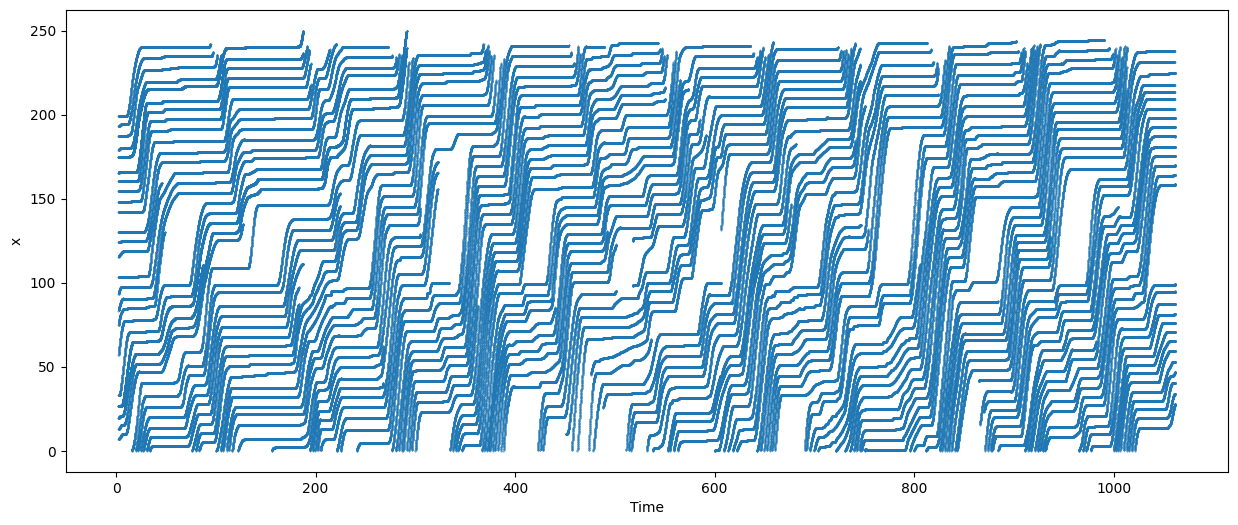

In [173]:
df = all_LFdata[0]
plt.figure(figsize=(15, 6))
plt.scatter(df['time'], df['x_fol'], s=.1)
plt.xlabel('Time')
plt.ylabel('x')
plt.show()


In [202]:
generate_plots(all_LFdata[0], all_pairID_fin[0], sig1)

In [181]:
all_LFdata[0].head()

,time,veh_id_fol,x_fol,v_fol,acc_fol,spacing_fol,veh_id_pre,x_pre,v_pre,acc_pre,state_fol,signal_fol,signal_pre
308791,293.92,1018Car,0.086804,24.225656,-0.026042,19.114307,945Car,19.201111,24.981808,-0.823736,coa,1,1
308792,293.96,1018Car,0.367032,24.222296,-0.020764,19.092606,945Car,19.459638,24.861244,-0.849972,coa,1,1
308793,294.00,1018Car,0.625559,24.219676,-0.015708,19.092606,945Car,19.718165,24.737016,-0.874542,coa,1,1
308794,294.04,1018Car,0.905786,24.217772,-0.010833,19.092606,945Car,19.998392,24.609376,-0.897458,coa,1,1
308795,294.08,1018Car,1.164313,24.216556,-0.006264,19.092606,945Car,20.256919,24.478548,-0.918917,coa,1,1
